In [5]:
# mount gg drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import các thư viện

In [14]:
# import thư viện
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from imutils import paths
import os

import pandas as pd
import numpy as np

#Model Alexnet

In [15]:
# định nghĩa Alexnet
class Alexnet:
  def __init__(self, cs = 1000,  bp = "FC3"):
    self.classifer = cs
    self.breakPoint = bp
    self.model = None

  # cài đặt model
  def define_model(self):
    model = Sequential()
    model.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    model.add(Flatten())
    model.add(Dense(4096,activation='relu'))

    # rút trích features lớp FC1
    if (self.breakPoint == "FC1"):
      self.model = model
      return

    model.add(Dropout(0.5))
    model.add(Dense(4096,activation='relu'))

    # rút trích features lớp FC2
    if (self.breakPoint == "FC2"):
      self.model = model
      return
    
    model.add(Dropout(0.5))
    model.add(Dense(self.classifer,activation='softmax'))
    self.model = model

  # predict 
  def predict(self, data):
    return self.model.predict(data)

  # get summary of model
  def summary(self):
    print(self.model.summary())

  # get model
  def get_model(self):
    return self.model

  # get/set break point
  def get_breakPoint(self):
    return self.breakPoint
  def set_breakPoint(self, bp):
    self.breakPoint = bp

  # get/set class
  def get_class(self):
    return self.classifer
  def set_class(self, c):
    self.classifer = c

#Tiền xử lí dữ liệu

In [16]:
# get feature from model
def getFeature(imagePath, model):
  # preprocess image
  image = load_img(imagePath,target_size=(227,227))
  img_array = img_to_array(image)
  img_array = np.expand_dims(img_array, axis=0)

  # get feature 
  feature = model.predict(img_array)
  feature = feature.reshape(-1)

  return feature

In [20]:
# feature extraction
def featureExtraction(imageDir, model):
  imagePaths = list(paths.list_images(imageDir))

  features = []
  labels = []

  for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    features.append(getFeature(imagePath,model))

    if (label == "sofa"):
      labels.append(0)
    else:
      labels.append(1)
  
  # create dataFrame
  # dataset = pd.DataFrame(
  # {
  #   "Featrues": features,
  #   "labels" : labels   
  # })
  return np.array(features),np.array(labels)

#Lưu lại features và labels của từng lớp

In [21]:
# main function
if __name__ ==  "__main__":
  pathDir = '/content/drive/MyDrive/data_AdvancedCV'

  # setting model
  model = Alexnet(cs=2,bp="FC1")
  model.define_model()
  model.summary()

  # feature extraction
  # FC1
  features_1 , labels_1 = featureExtraction(pathDir, model)
  np.savetxt("/content/drive/MyDrive/data_AdvancedCV/FC1_features.txt",features_1)
  np.savetxt("/content/drive/MyDrive/data_AdvancedCV/FC1_labels.txt",labels_1)

  # FC2
  model.set_breakPoint(bp="FC2")
  model.define_model()
  model.summary()
  features_2, labels_2 = featureExtraction(pathDir, model)
  np.savetxt("/content/drive/MyDrive/data_AdvancedCV/FC2_features.txt",features_2)
  np.savetxt("/content/drive/MyDrive/data_AdvancedCV/FC2_labels.txt",labels_2)

  # # show 
  # print(dt_feature)
  # print(dataset.shape)

  # print(dataset2)
  # print(dataset.shape)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization_5 (Batch (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_6 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 384)      

#Import các thư viện cần thiết để trainning

In [22]:

# thêm thư viện.
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [23]:
# đọc dữ liệu từ các file .txt thông qua thư viện numpy.
feature_FC1 = np.loadtxt('/content/drive/MyDrive/data_AdvancedCV/FC1_features.txt')
feature_FC2 = np.loadtxt('/content/drive/MyDrive/data_AdvancedCV/FC2_features.txt')


labels_FC1 = np.loadtxt('/content/drive/MyDrive/data_AdvancedCV/FC1_labels.txt')
labels_FC2 = np.loadtxt('/content/drive/MyDrive/data_AdvancedCV/FC1_labels.txt')

print(feature_FC1)
print(feature_FC2)

[[ 0.          0.85979384 10.3094101  ...  5.18695068  1.58713794
   8.85227299]
 [ 0.          0.         13.12308884 ...  4.99835062  8.61166477
   4.67123652]
 [ 0.          0.         11.2062788  ...  4.11244822  3.78367805
   7.58429527]
 ...
 [ 0.          1.0334717  14.47525215 ...  6.97779369  6.38098001
   5.52917194]
 [ 0.          0.          8.52771378 ...  5.32062101  2.73540807
   4.4944849 ]
 [ 0.25701365  0.40238145 10.80965996 ...  6.07190418  8.31420517
   7.27575064]]
[[ 1.70301402  5.02227736  5.63460302 ...  0.          0.
   1.29868293]
 [ 0.          6.5121088   4.64696264 ...  0.          0.
   0.26899561]
 [ 1.66714311 10.43301487  4.18591881 ...  0.          0.
   0.34587869]
 ...
 [ 1.18561697  3.92195392  4.93034983 ...  0.          0.
   3.67545295]
 [ 0.6170637   7.71110249  5.98326445 ...  0.          0.
   1.16851616]
 [ 0.          4.6191287   5.43300056 ...  0.          0.
   0.94451541]]


#Chia data thành 2 phần train và test

In [25]:
# tiến hành chia dữ liệu để thực hiện quá trình ra 2 phần train và test.
feature_FC1_train, feature_FC1_test, labels_FC1_train, labels_FC1_test = train_test_split(feature_FC1, labels_FC1, test_size = 0.2, random_state = 1)
feature_FC2_train, feature_FC2_test, labels_FC2_train, labels_FC2_test = train_test_split(feature_FC2, labels_FC2, test_size = 0.2, random_state = 1)

#FC1

              precision    recall  f1-score   support

         0.0       0.71      0.75      0.73        16
         1.0       0.83      0.79      0.81        24

    accuracy                           0.78        40
   macro avg       0.77      0.77      0.77        40
weighted avg       0.78      0.78      0.78        40

Confusion matrix:
[[12  5]
 [ 4 19]]


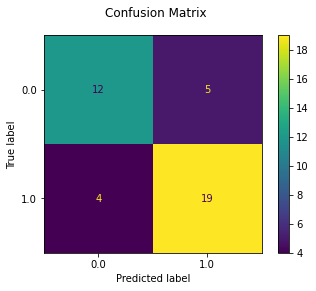

In [26]:
# tạo một bộ phân loại.
clf_FC1 = make_pipeline(StandardScaler(), SVC(gamma='auto'))

# tiến hành học từ tập dữ liệu train.
clf_FC1.fit(feature_FC1_train, labels_FC1_train)

# tiến hành dự đoán dựa trên tập test
predicted_FC1 = clf_FC1.predict(feature_FC1_test)

# hiển thị các chỉ số đánh giá chính.
print(classification_report(predicted_FC1, labels_FC1_test))

# hiển thị ma trận Confusion matrix
conf_FC1 = metrics.plot_confusion_matrix(clf_FC1, feature_FC1_test, labels_FC1_test)
conf_FC1.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{conf_FC1.confusion_matrix}")
plt.show()

#FC2

              precision    recall  f1-score   support

         0.0       0.65      0.69      0.67        16
         1.0       0.78      0.75      0.77        24

    accuracy                           0.73        40
   macro avg       0.71      0.72      0.72        40
weighted avg       0.73      0.72      0.73        40

Confusion matrix:
[[11  6]
 [ 5 18]]


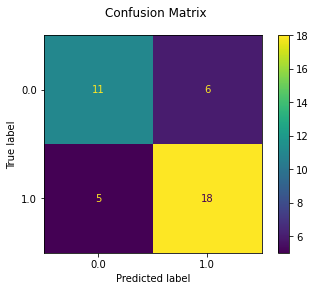

In [27]:
# tạo một bộ phân loại.
clf_FC2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))

# tiến hành học từ tập dữ liệu train.
clf_FC2.fit(feature_FC2_train, labels_FC2_train)

# tiến hành dự đoán dựa trên tập test
predicted_FC2 = clf_FC2.predict(feature_FC2_test)

# hiển thị các chỉ số đánh giá chính.
print(classification_report(predicted_FC2, labels_FC2_test))

# hiển thị ma trận Confusion matrix
conf_FC2 = metrics.plot_confusion_matrix(clf_FC2, feature_FC2_test, labels_FC2_test)
conf_FC2.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{conf_FC2.confusion_matrix}")
plt.show()